## Bitcoin Tweets Scraping and Analysis using Twitter API, Tweepy, and TextBlob

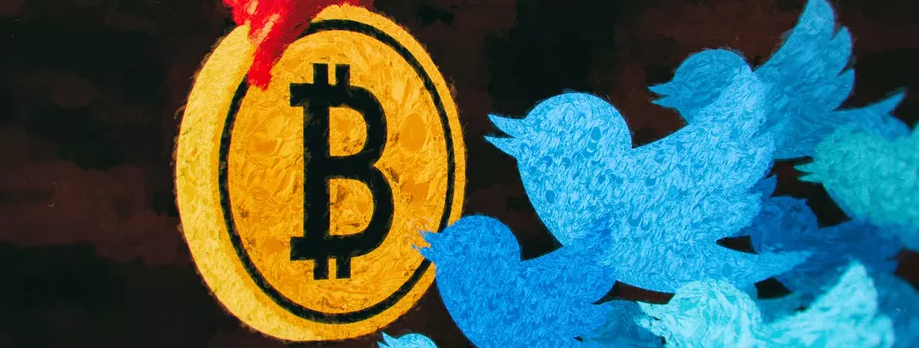

## Introduction

There was a continuous rise in cryptocurrency activity in late 2020 which then continued strongly in early 2021. In the last two weeks of February, Bitcoin (BTC) experienced a big price spike as well as price correction. BTC price was at $45,0000 as of February 11, 2021 which eventually rose to $58,000 by February 22, 2021 - a 28% increase in your investment if you entered at the right time! However, after just two days, BTC prices fell back to $47,000 and a lot of new traders who mistakenly bought at top are affected.

In this project, we will look over tweets about Bitcoin to identify the sentiments of possible traders after the sudden correction. By using Twitter API and Tweepy, we will be scraping tweets from February 24, where BTC price sits at $49,000. We will then use TextBlob to quick identify its sentiments.

Note that one of possible limitations in this is that we are unable to detect sarcasm from the tweets.

 ## Importing Packages and loading API

In [1]:
import os
import tweepy as tw
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
consumer_key= 'qneae5R2vMH8N9nCeMI9oUiJC'
consumer_secret= 'eFgjijFyQvmaLgNQ0W4AEnMnINg5oGnvm6FQDyvHy6Yl0raoNN'
access_token= '1189978110067785729-IAkpFfDJFqHw1v9kjzUlC5xXAdbqDN'
access_token_secret= 'deu5Vk4StW3WZuFl79Ssx5FuCL1c3IPjCjJfqJffe6ZRW'

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

## API crawl

In [4]:
user_new_search = "bitcoin -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=user_new_search,
                   lang="en",
                   since='2021-02-24').items(2000)

twitter_data = [[tweet.text, tweet.user.screen_name, tweet.user.location, tweet.created_at] for tweet in tweets]
twitter_data

[['@Halsrethink Blockchain is permissionless. It could only be taxed to death if those Bitcoin were sold for fiat, whi… https://t.co/mumfgaVrn0',
  'JeSuisPierce',
  '',
  datetime.datetime(2021, 2, 24, 17, 51, 23)],
 ['@PolkadotPePe The only thing planned with Bitcoin is between 4 hours and 4 days waiting for your transaction to be… https://t.co/xvuVMgZGiP',
  'SteveDLTfan',
  '',
  datetime.datetime(2021, 2, 24, 17, 51, 22)],
 ['‘Get Used To Me’: Louis DeJoy Says He Has No Plans To Leave Postal Service (https://t.co/HNtagZYiYV) (… https://t.co/iC3b4XORvi',
  'iElielSepulchro',
  'Asgard',
  datetime.datetime(2021, 2, 24, 17, 51, 22)],
 ['Closing The Gap? When UK Retail Reawakens, Major Brands Will Have Disappeared For Good (https://t.co/HNtagZYiYV) (… https://t.co/ydJHL2244c',
  'iElielSepulchro',
  'Asgard',
  datetime.datetime(2021, 2, 24, 17, 51, 22)],
 ['Thanks to everyone your thankful message on your big gains return. Glad you took my #crypto advice just remember wh… https://t.

In [5]:
# users
df = pd.DataFrame(twitter_data,columns=['tweets', 'users', 'location', 'date'])
df

,tweets,users,location,date
0,@Halsrethink Blockchain is permissionless. It ...,JeSuisPierce,,2021-02-24 17:51:23
1,@PolkadotPePe The only thing planned with Bitc...,SteveDLTfan,,2021-02-24 17:51:22
2,‘Get Used To Me’: Louis DeJoy Says He Has No P...,iElielSepulchro,Asgard,2021-02-24 17:51:22
3,"Closing The Gap? When UK Retail Reawakens, Maj...",iElielSepulchro,Asgard,2021-02-24 17:51:22
4,Thanks to everyone your thankful message on yo...,sonnyleyba,"Los Angeles, CA",2021-02-24 17:51:21
...,...,...,...,...
1995,"Yo Bitcoin-maximalists, how did you come to be...",floraworley,PNW Anarchist Jurisdiction 2,2021-02-24 17:16:46
1996,@bethanymac12 Bitcoin uses proof-of-work block...,darkleopard3,"London, England",2021-02-24 17:16:44
1997,Hitbtc - Volume changed on Bitcoin Diamond (BT...,Crypt_Analytics,,2021-02-24 17:16:43
1998,One Of Bitcoin's Biggest Backers Just Spent $1...,ShawcrossYen,,2021-02-24 17:16:43


In [6]:
df.to_csv(r'C:\Users\ACER\Desktop\bitcoin0224_tweets.csv')

In [7]:
tweets = pd.read_csv(r'C:\Users\ACER\Desktop\bitcoin0224_tweets.csv')
tweets.drop(tweets.iloc[:, 0:1], inplace = True, axis = 1)
tweets

,tweets,users,location,date
0,@Halsrethink Blockchain is permissionless. It ...,JeSuisPierce,NaN,2021-02-24 17:51:23
1,@PolkadotPePe The only thing planned with Bitc...,SteveDLTfan,NaN,2021-02-24 17:51:22
2,‘Get Used To Me’: Louis DeJoy Says He Has No P...,iElielSepulchro,Asgard,2021-02-24 17:51:22
3,"Closing The Gap? When UK Retail Reawakens, Maj...",iElielSepulchro,Asgard,2021-02-24 17:51:22
4,Thanks to everyone your thankful message on yo...,sonnyleyba,"Los Angeles, CA",2021-02-24 17:51:21
...,...,...,...,...
1995,"Yo Bitcoin-maximalists, how did you come to be...",floraworley,PNW Anarchist Jurisdiction 2,2021-02-24 17:16:46
1996,@bethanymac12 Bitcoin uses proof-of-work block...,darkleopard3,"London, England",2021-02-24 17:16:44
1997,Hitbtc - Volume changed on Bitcoin Diamond (BT...,Crypt_Analytics,NaN,2021-02-24 17:16:43
1998,One Of Bitcoin's Biggest Backers Just Spent $1...,ShawcrossYen,NaN,2021-02-24 17:16:43


## Textblob

In [8]:
#to merge the CSV files
import glob
from textblob import TextBlob

In [9]:
#make case uniform since searching strings are case sensitive
df['tweets'] = df['tweets'].str.lower()
df['tweets'] = df['tweets'].astype(str)

#put the polarity and subjectivity in the dataframe
tweets['polarity'] = tweets['tweets'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
tweets['subjectivity'] = tweets['tweets'].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)

#put the polarity and subjectivity in the dataframe
tweets['polarity'] = tweets['tweets'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
tweets['subjectivity'] = tweets['tweets'].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)

tweets['polarity'] = tweets['polarity'].astype(float)
tweets['subjectivity'] = tweets['subjectivity'].astype(float)

tweets.loc[(tweets["polarity"] > 0) , "Sentiment"] = 'positive'
tweets.loc[(tweets["polarity"] < 0), "Sentiment"] = 'negative'
tweets.loc[(tweets["polarity"] == 0), "Sentiment"] = 'neutral'

tweets['date'] = pd.to_datetime(tweets['date']).dt.strftime('%m/%d')

tweets['count'] = 1

tweets.to_csv("sentiments.csv")

tweets

,tweets,users,location,date,polarity,subjectivity,Sentiment,count
0,@Halsrethink Blockchain is permissionless. It ...,JeSuisPierce,NaN,02/24,0.000000,1.000000,neutral,1
1,@PolkadotPePe The only thing planned with Bitc...,SteveDLTfan,NaN,02/24,0.000000,1.000000,neutral,1
2,‘Get Used To Me’: Louis DeJoy Says He Has No P...,iElielSepulchro,Asgard,02/24,0.000000,0.000000,neutral,1
3,"Closing The Gap? When UK Retail Reawakens, Maj...",iElielSepulchro,Asgard,02/24,0.381250,0.550000,positive,1
4,Thanks to everyone your thankful message on yo...,sonnyleyba,"Los Angeles, CA",02/24,0.233333,0.433333,positive,1
...,...,...,...,...,...,...,...,...
1995,"Yo Bitcoin-maximalists, how did you come to be...",floraworley,PNW Anarchist Jurisdiction 2,02/24,0.700000,0.600000,positive,1
1996,@bethanymac12 Bitcoin uses proof-of-work block...,darkleopard3,"London, England",02/24,-0.166667,0.066667,negative,1
1997,Hitbtc - Volume changed on Bitcoin Diamond (BT...,Crypt_Analytics,NaN,02/24,0.000000,0.000000,neutral,1
1998,One Of Bitcoin's Biggest Backers Just Spent $1...,ShawcrossYen,NaN,02/24,0.200000,0.300000,positive,1


In [10]:
tweets.describe()

,polarity,subjectivity,count
count,2000.000000,2000.000000,2000.0
mean,0.107569,0.296660,1.0
std,0.249979,0.311150,0.0
min,-0.800000,0.000000,1.0
25%,0.000000,0.000000,1.0
50%,0.000000,0.241369,1.0
75%,0.214286,0.533333,1.0
max,1.000000,1.000000,1.0


## Sentiment Checking

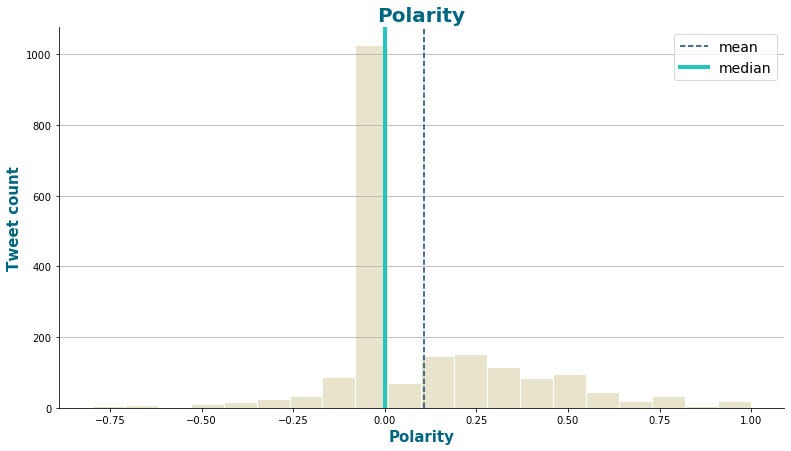

In [11]:
import matplotlib.pyplot as plt

#Check Polarity Sample to decide if we remove neutral

ax = tweets['polarity'].hist(bins=20, edgecolor='w', color='#E7E4CB',  figsize=(13, 7))

# Here you can override the colors of set using rcParams by simply passing a value for the arguments.
ax.set_title('Polarity', color='#006680', fontweight='bold', fontsize=20)
ax.set_xlabel('Polarity', color='#006680', fontweight='bold', fontsize=15)
ax.set_ylabel('Tweet count', color='#006680',fontweight='bold', fontsize=15);

# To remove the spines of the chart manually, you can choose to set the visibility to False
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.grid(False)

ax.axvline(x=tweets['polarity'].mean(), color='#164066', linestyle='--', label='mean')
ax.axvline(x=tweets['polarity'].median(), color='#25C5BF', linewidth=4, label='median')
ax.legend(fontsize=14);

In [12]:
sentiment = tweets.groupby(['Sentiment'])['count'].aggregate('sum')
sentiment

Sentiment
negative    246
neutral     967
positive    787
Name: count, dtype: int64

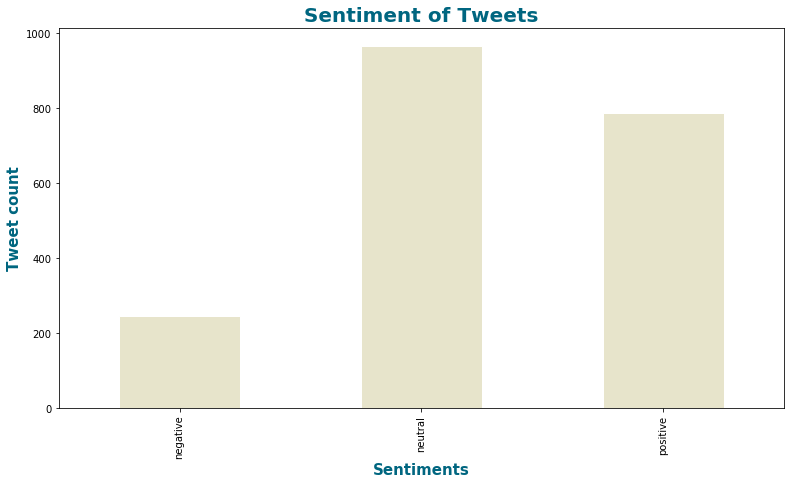

In [13]:
ax = sentiment.plot.bar(figsize=(13, 7), edgecolor='w', color='#E7E4CB')

ax.set_xlabel('Sentiments', color='#006680', fontsize=15, fontweight='bold')
ax.set_ylabel('Tweet count', color='#006680', fontsize=15, fontweight='bold')
ax.set_title('Sentiment of Tweets', color='#006680', fontweight='bold', fontsize=20);